In [1]:
from f_measurents import *

In [2]:
# Config
import config
import os
landmarks = config.landmarks
top_to_bottom_angle_ref = config.top_to_bottom_angle_ref
top_to_bottom_angle_max_deviation = config.top_to_bottom_angle_max_deviation
left_to_right_angle_ref = config.left_to_right_angle_ref
left_to_right_angle_max_deviation_perc = config.left_to_right_angle_max_deviation_perc
area_ratio_right_to_left_max_deviation_perc = config.area_ratio_right_to_left_max_deviation_perc
area_ratio_right_to_left_ref = config.area_ratio_right_to_left_ref
# 
interactive_plot = True

# Static Image

In [3]:
image_path = os.getcwd() + '/input/2.jpeg'
image_path

'/Users/danielfiuzadosil/Documents/GitHub_Repo/IPD_measuring_app/input/2.jpeg'

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


True

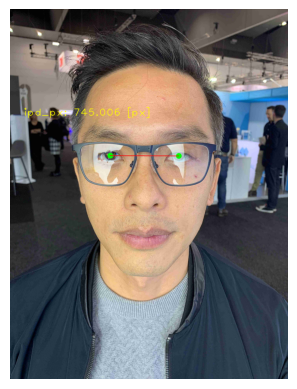

In [4]:
image = cv2.imread(image_path)
# exif = extract_exif_metadata(image_path)
# focal_length, focal_length_in_35mm_film = focal_length_metadata(image_path)
# print(focal_length, focal_length_in_35mm_film)
image = process_image(image, landmarks, top_to_bottom_angle_ref, top_to_bottom_angle_max_deviation, left_to_right_angle_ref, left_to_right_angle_max_deviation_perc, area_ratio_right_to_left_max_deviation_perc, area_ratio_right_to_left_ref)
plt.axis('off')
plt.imshow(image)
cv2.imwrite('output/processing_image.jpg', image_rgb_to_bgr(image)) 

In [5]:
if interactive_plot == True:
    image = cv2.imread(image_path)
    image = image_bgr_to_rgb(image)
    result, mesh_points = face_mesh_points(image)
    fig = mesh_points_interactive_plot_with_image(mesh_points, image_path)
    fig.show()
    fig = mesh_points_interactive_plot(mesh_points)
    fig.show()

# Webcam

In [6]:
stop!

SyntaxError: invalid syntax (3319058519.py, line 1)

In [7]:
cap = cv2.VideoCapture(0)

In [8]:
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    try:
        cv2.imshow("Input", image_rgb_to_bgr(process_image(frame, landmarks, top_to_bottom_angle_ref, top_to_bottom_angle_max_deviation, left_to_right_angle_ref, left_to_right_angle_max_deviation_perc, area_ratio_right_to_left_max_deviation_perc, area_ratio_right_to_left_ref)))
    except:
        cv2.imshow("Input", frame)
    c = cv2.waitKey(1)

cap.release()
cv2.destroyAllWindows()

: 

: 